<a href="https://colab.research.google.com/github/muscak/Data-Analysis-Yearly-CO2-Emission/blob/main/CO2_Emission_Dynamic_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this study to create dynamic plots to have better understanding on the data.\
It's almost identical to the dashboard [video](https://www.youtube.com/watch?v=uhxiXOTKzfs&t=526s) of Thu Vu Youtube channel. We'll be using [Panel](https://panel.holoviz.org/) and [hvPlo](https://hvplot.holoviz.org/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive') # Mount the google drive 

Mounted at /content/gdrive


In [ ]:
# Read the data from .csv file
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ Data-Analysis-Yearly-CO2-Emission/data/energy.csv')
df.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


First the data will be processed based on the outcome of [this](https://github.com/muscak/Data-Analysis-Yearly-CO2-Emission/blob/main/CO2_EDA.ipynb) study.

In [ ]:
df = df.drop('Unnamed: 0', axis='columns') 
df = df[df['Year'] >= 1995]
df = df[df['Country'] != 'World']
temp_gdp = pd.DataFrame(df[['GDP', 'Population', 'Energy_consumption']].isnull().groupby(df['Country']).sum()).reset_index()
null_countries = temp_gdp[(temp_gdp['GDP'] >= 100) | (temp_gdp['Population'] >= 100) | (temp_gdp['Energy_consumption'] >= 100)]['Country'].unique()
df = df[~df['Country'].isin(null_countries)]
df = df.fillna(0) # So the Null values don't mass the calculations
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30300 entries, 0 to 30299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      30300 non-null  object 
 1   Energy_type                  30300 non-null  object 
 2   Year                         30300 non-null  int64  
 3   Energy_consumption           30300 non-null  float64
 4   Energy_production            30300 non-null  float64
 5   GDP                          30300 non-null  float64
 6   Population                   30300 non-null  float64
 7   Energy_intensity_per_capita  30300 non-null  float64
 8   Energy_intensity_by_GDP      30300 non-null  float64
 9   CO2_emission                 30300 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
df.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,Afghanistan,all_energy_types,1995,0.025348,0.011739,24.393,18110.7,1.399641,1.03917,1.599941
1,Afghanistan,coal,1995,0.000104,0.000099,24.393,18110.7,1.399641,1.03917,0.011663
2,Afghanistan,natural_gas,1995,0.007392,0.007392,24.393,18110.7,1.399641,1.03917,0.588278
3,Afghanistan,petroleum_n_other_liquids,1995,0.013194,0.000000,24.393,18110.7,1.399641,1.03917,1.000000
4,Afghanistan,nuclear,1995,0.000000,0.000000,24.393,18110.7,1.399641,1.03917,0.000000


In [ ]:
import panel as pn
pn.extension('tabulator')

In [ ]:
# to create interactive dataframes
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.2 MB/s 


In [ ]:
import hvplot.pandas

In [ ]:
idf = df.interactive()

In [ ]:
year_slider = pn.widgets.IntSlider(name='Year Slider', start=df['Year'].unique().min().item(), #.time() to convert numpy.int64 to python integer
                                   end=df['Year'].unique().max().item(), 
                                   step=1, value=1995)
year_slider

IntSlider(end=2019, name='Year Slider', start=1995, value=1995)

In [ ]:
y_axis = pn.widgets.RadioButtonGroup(
    name = 'Y Axis',
    options = ['CO2_emission', 'Population', 'GDP', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP'],
    button_type = 'success'
)

In [ ]:
countries = ['Turkey', 'United States', 'Germany', 'United Kingdom', 'Russia']

co2_pipeline = (
    idf[
           (idf.Year <= year_slider) &
           (idf.Country.isin(countries))
    ]
    .groupby(['Country', 'Year'])[y_axis].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)

In [ ]:
co2_pipeline

In [ ]:
co2_plot = co2_pipeline.hvplot(x='Year', by='Country', y=y_axis, line_width=2, title='CO2')
co2_plot

In [ ]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')
co2_table

##Scatter Plot

In [ ]:
c02_vs_gdp_scatterplot_pipeline = (
    idf[
           (idf.Year <= year_slider) &
           (idf.Country.isin(countries))
    ]
    .groupby(['Country', 'Year', 'GDP'])['CO2_emission'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)

In [ ]:
c02_vs_gdp_scatterplot_pipeline

In [ ]:
c02_vs_gdp_scatterplot = c02_vs_gdp_scatterplot_pipeline.hvplot(x='GDP', y='CO2_emission', by='Country',
                                                                size=80, kind='scatter', alpha=0.7, 
                                                                legend=True, height=500, width=800)
c02_vs_gdp_scatterplot

##Bar chart with CO<sub>2</sub> sources by country 

In [ ]:
co2_sources = df['Energy_type'].unique()
co2_sources = co2_sources[co2_sources != 'all_energy_types']

In [ ]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y Axis',
    options=co2_sources.tolist(),
    button_type='success'
)

co2_source_bar_pipeline = (
    idf[
           (idf.Year <= year_slider) &
           (idf.Country.isin(countries))
    ]
    .groupby(['Year', 'Country', 'Energy_type'])['CO2_emission'].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)

In [ ]:
co2_source_barplot = co2_source_bar_pipeline.hvplot(kind='bar',
                                                    x='Country',
                                                    y='CO2_emission',
                                                    title='CO2 Source by Country',
                                                    legend=True)
co2_source_barplot

##Creating the Dashboard
It's going to be look like the below image.
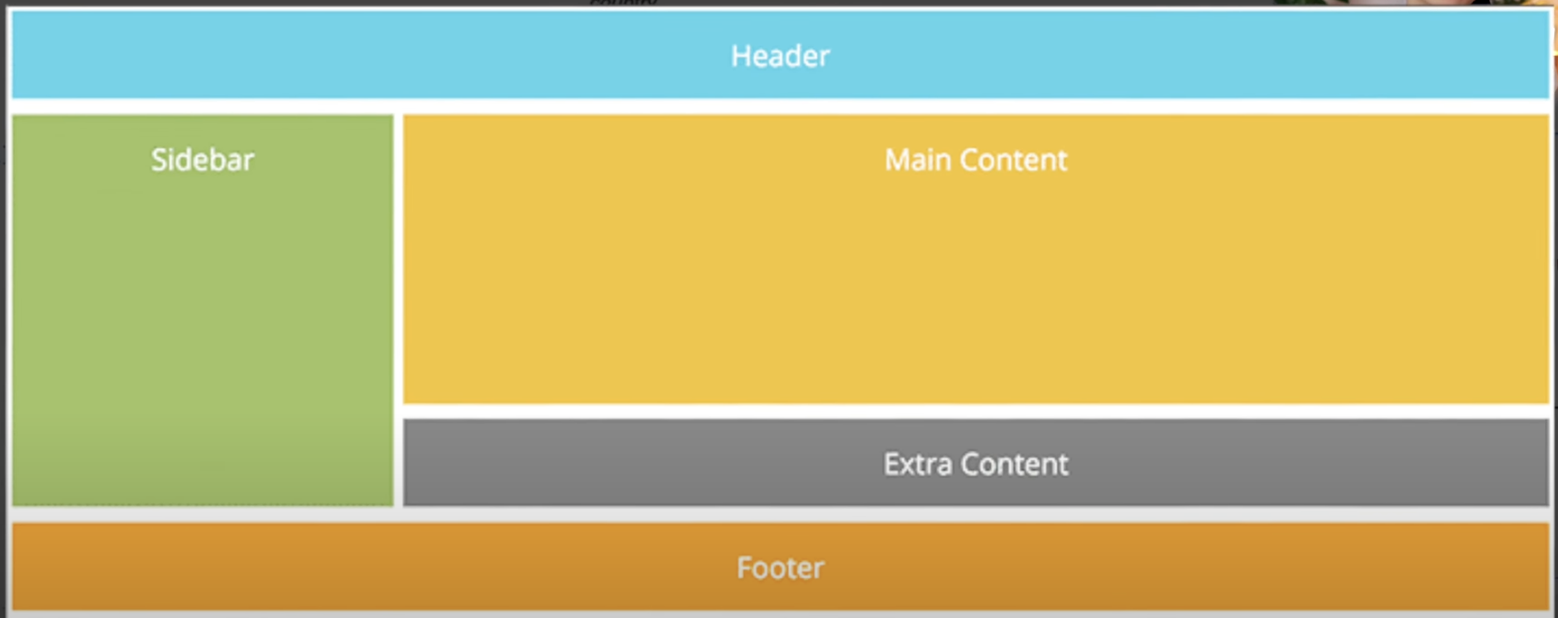

In [ ]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

To serve, go to terminal and type the command `panel serve file_name.ipunb`